Загружаем данные.

Последние семь дней (это просто продублированные значения из таблицы за последнюю известную дату - 8 дней назад).

Вам нужно спрогнозировать цену биткоина (Price) на последние семь дней.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error

data = pd.read_csv("Bitcoin_kaggle.csv",
                  delimiter=';',
                  parse_dates=True,
                  index_col='Date'
                  )

print(len(data))

data = data.sort_index()

data.tail(10)

547


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-07-05,"30,512.8","30,768.6","30,875.6","30,233.3",43.23K,-0.83%
2023-07-06,"29,913.1","30,512.8","31,463.6","29,869.0",90.81K,-1.97%
2023-07-07,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-08,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-09,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-10,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-11,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-12,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-13,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%


Преобразуем Price в нужный формат.

In [ ]:
data['Price'] = data['Price'].apply(lambda x: float(x.replace(",","")))

In [ ]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-01-14,43073.3,"42,562.2","43,435.1","41,848.7",50.50K,1.21%
2022-01-15,43097.0,"43,073.6","43,777.9","42,586.1",31.44K,0.06%
2022-01-16,43079.1,"43,079.2","43,462.0","42,643.3",28.66K,-0.04%
2022-01-17,42209.3,"43,080.5","43,179.6","41,559.4",41.44K,-2.02%
2022-01-18,42364.6,"42,209.9","42,674.2","41,300.7",47.32K,0.37%
...,...,...,...,...,...,...
2023-07-10,30346.4,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-11,30346.4,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-12,30346.4,"29,912.7","30,442.0","29,757.4",46.42K,1.45%


<Axes: xlabel='Date'>

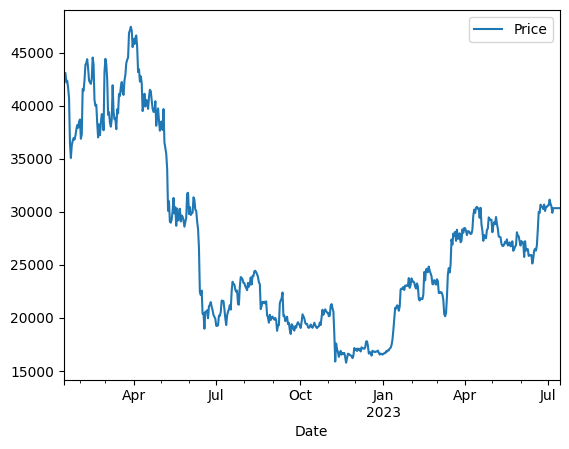

In [ ]:
data = data[['Price']]

data.plot()

In [ ]:
!pip install yfinance
import yfinance as yf
data_sp = yf.download("^GSPC", start="2022-01-14", end="2023-07-14")
data_eth = yf.download("ETH-USD", start="2022-01-14", end="2023-07-14")

data_oil = yf.download("CL=F", start="2022-01-14", end="2023-07-14")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#data_sp = data_sp['Adj Close']
data_eth = data_eth['Adj Close']
#data_oil = data_oil['Adj Close']

In [ ]:
data1 = pd.merge(data, data_eth, on='Date', how = 'outer')

In [ ]:
data1 = data1.head(540)

In [ ]:
!pip install etna -q
from etna.datasets.tsdataset import TSDataset


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
sxmodel = pm.auto_arima(data1[['Price']], exogenous=data1[['Adj Close']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=10,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[10] intercept   : AIC=9360.684, Time=2.54 sec
 ARIMA(0,0,0)(0,1,0)[10] intercept   : AIC=9958.168, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[10] intercept   : AIC=9343.257, Time=2.17 sec
 ARIMA(0,0,1)(0,1,1)[10] intercept   : AIC=9667.546, Time=1.44 sec
 ARIMA(0,0,0)(0,1,0)[10]             : AIC=9958.464, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[10] intercept   : AIC=9492.794, Time=0.73 sec
 ARIMA(1,0,0)(2,1,0)[10] intercept   : AIC=9338.719, Time=4.75 sec
 ARIMA(1,0,0)(2,1,1)[10] intercept   : AIC=9340.629, Time=7.91 sec
 ARIMA(1,0,0)(1,1,1)[10] intercept   : AIC=9338.748, Time=3.90 sec
 ARIMA(0,0,0)(2,1,0)[10] intercept   : AIC=9932.087, Time=1.90 sec
 ARIMA(2,0,0)(2,1,0)[10] intercept   : AIC=9340.718, Time=5.09 sec
 ARIMA(1,0,1)(2,1,0)[10] intercept   : AIC=9340.729, Time=8.53 sec
 ARIMA(0,0,1)(2,1,0)[10] intercept   : AIC=9595.732, Time=4.23 sec
 ARIMA(2,0,1)(2,1,0)[10] intercept   : AIC=inf, Time=11.46 sec
 ARIMA(1,0,0)(2,1,0)[10

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  540
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 10)   Log Likelihood               -4664.623
Date:                            Fri, 11 Aug 2023   AIC                           9337.247
Time:                                    10:20:41   BIC                           9354.338
Sample:                                01-14-2022   HQIC                          9343.937
                                     - 07-07-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8036      0.007    118.730      0.000       0.790       0.817
ar.S.L10      -0.5398      0.019    -28.039      0.000      -0.578      -0.502
ar.S.L20      -0.1035      0.022     -4.724      0.000      -0.146      -0.061
sigma2      2.271e+06   3.36e-09   6.75e+14      0.000    2.27e+06    2.27e+06
===================================================================================
Ljung-Box (L1) (Q):                  11.83   Jarque-Bera (JB):             31498.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -3.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+30. Standard errors may be unstable.
"""

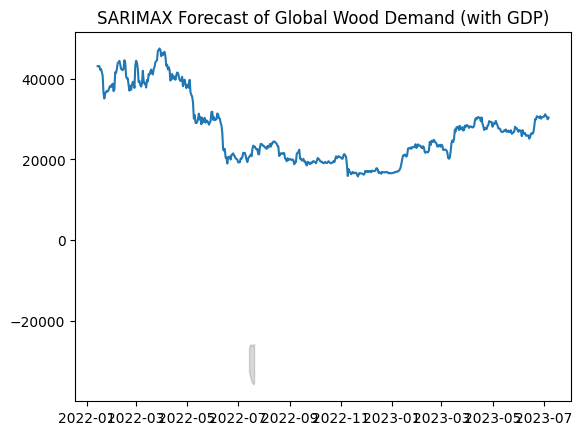

In [ ]:
n_periods = 7
fitted, confint = sxmodel.predict(n_periods=n_periods,
                                  exogenous=data1[['Adj Close']],
                                  return_conf_int=True)

index_of_fc = pd.Series(pd.date_range("2022-07-14", periods=n_periods, freq="D"))

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data1.Price)
plt.plot(-fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 -lower_series,
                 -upper_series,
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of Global Wood Demand (with GDP)")
plt.show()

In [ ]:
pd.DataFrame(fitted).to_csv('sarimax.csv')

In [ ]:
df = data
df = df.reset_index()
df["timestamp"] = pd.to_datetime(df['Date'])
df["target"] = df["Price"]
df.drop(columns=["Date", 'Price'], inplace=True)
df["segment"] = "main"

In [ ]:
df

,timestamp,target,segment
0,2022-01-14,43073.3,main
1,2022-01-15,43097.0,main
2,2022-01-16,43079.1,main
3,2022-01-17,42209.3,main
4,2022-01-18,42364.6,main
...,...,...,...
542,2023-07-10,30346.4,main
543,2023-07-11,30346.4,main
544,2023-07-12,30346.4,main
545,2023-07-13,30346.4,main


In [ ]:
df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq="D")


In [ ]:
df

segment,main
feature,target
timestamp,
2022-01-14,43073.3
2022-01-15,43097.0
2022-01-16,43079.1
2022-01-17,42209.3
2022-01-18,42364.6
...,...
2023-07-10,30346.4
2023-07-11,30346.4


In [ ]:
train_ts, test_ts = ts.train_test_split(
    train_start="2022-01-14",
    train_end="2023-07-07",
    test_start="2023-07-08",
    test_end="2023-07-14",
)

In [ ]:
HORIZON = 7
from etna.models import NaiveModel

# Fit the model
model = NaiveModel(lag=12)
model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model.context_size)
forecast_ts = model.forecast(future_ts, prediction_size=HORIZON)

/usr/local/lib/python3.10/dist-packages/etna/models/seasonal_ma.py:64: UserWarning: This model doesn't work with exogenous features. Columns {"LagTransform(in_column = 'target', lags = [20], out_column = None, )", "LagTransform(in_column = 'target', lags = [17], out_column = None, )", "LagTransform(in_column = 'target', lags = [11], out_column = None, )", "LagTransform(in_column = 'target', lags = [23], out_column = None, )", "LagTransform(in_column = 'target', lags = [16], out_column = None, )", "LagTransform(in_column = 'target', lags = [9], out_column = None, )", "LagTransform(in_column = 'target', lags = [18], out_column = None, )", "LagTransform(in_column = 'target', lags = [22], out_column = None, )", "LagTransform(in_column = 'target', lags = [10], out_column = None, )", "LagTransform(in_column = 'target', lags = [12], out_column = None, )", "LagTransform(in_column = 'target', lags = [19], out_column = None, )", "LagTransform(in_column = 'target', lags = [21], out_column = None,

In [ ]:
from etna.metrics import SMAPE

In [ ]:
smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 0.6704422515135386}

In [ ]:
forecast_ts

segment,main
feature,target
timestamp,
2023-07-08,30267.0
2023-07-09,30689.1
2023-07-10,30078.6
2023-07-11,30445.7
2023-07-12,30472.9
2023-07-13,30586.8
2023-07-14,30617.7


In [ ]:
from etna.transforms import LagTransform, LogTransform

lags = LagTransform(in_column="target", lags=list(range(8, 24, 1)))
log = LogTransform(in_column="target")
transforms = [log, lags]
train_ts.fit_transform(transforms)

In [ ]:
from etna.models import CatBoostMultiSegmentModel

model = CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(future_steps=HORIZON, transforms=transforms)
forecast_ts = model.forecast(future_ts)
forecast_ts.inverse_transform(transforms)

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:279: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in expm1
  result = func(self.values, **kwargs)


In [ ]:
from etna.metrics import SMAPE

smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

/usr/local/lib/python3.10/dist-packages/etna/metrics/functional_metrics.py:131: RuntimeWarning: invalid value encountered in divide
  2 * np.abs(y_pred_array - y_true_array) / (np.abs(y_true_array) + np.abs(y_pred_array)).clip(eps), axis=axis


{'main': nan}

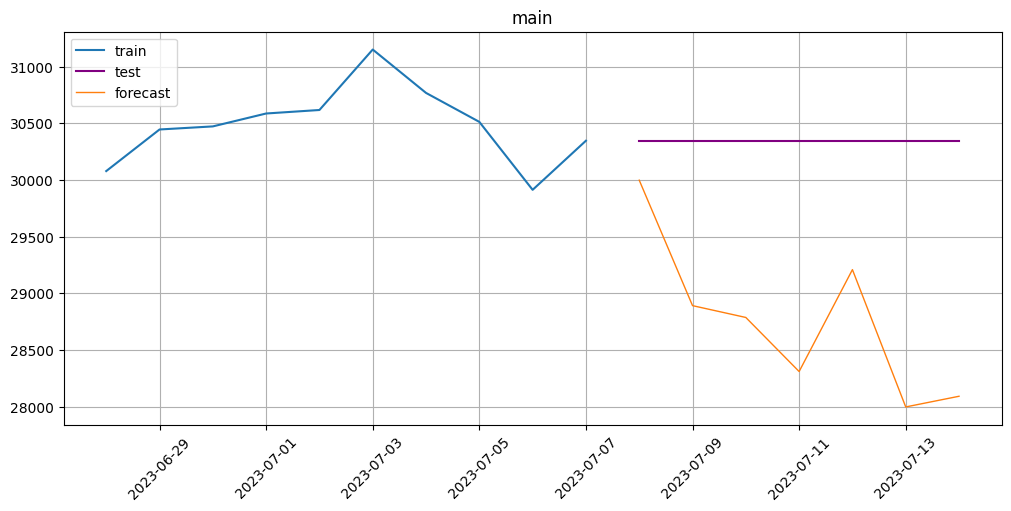

In [ ]:
from etna.analysis import plot_forecast

train_ts.inverse_transform(transforms)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)

In [ ]:
from etna.analysis import plot_forecast

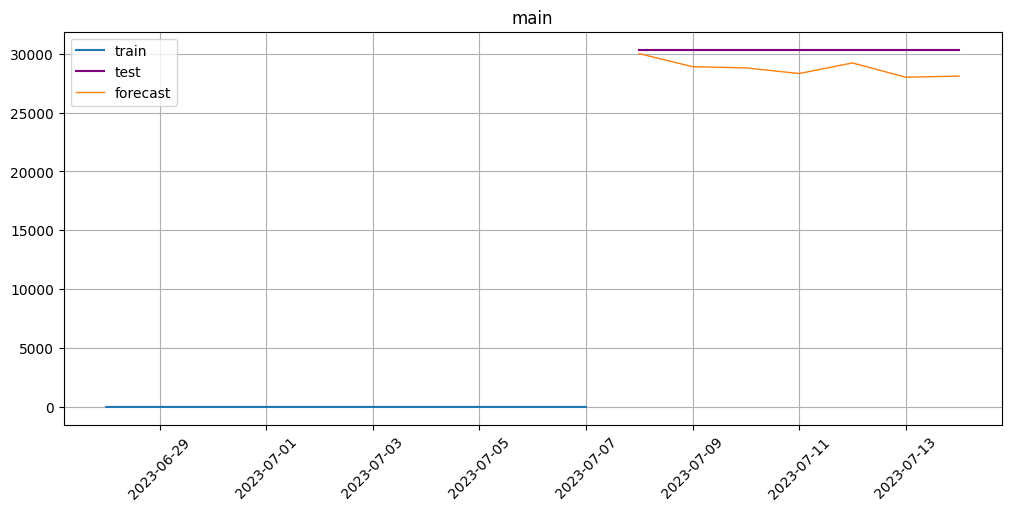

In [ ]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)

In [ ]:
from etna.models import ProphetModel

model = ProphetModel()
model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)

ValueError: ignored

In [ ]:
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 2.4279840214467168}

In [ ]:
# импортируем необходимую функцию
from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(data['Price'])

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.5306397656942439


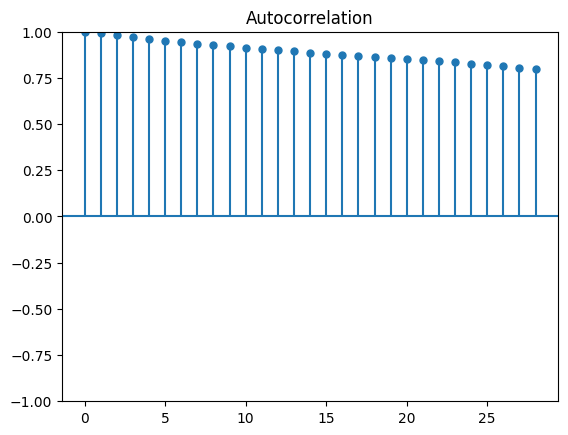

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# применим функцию к нашему набору данных
plot_acf(data, alpha = None)
plt.show()

In [ ]:
#data = data[:-7]

In [ ]:
'''alpha = 0.2

# первое значение совпадает со значением временного ряда
exp_smoothing = [data['Price'][0]]

# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(data['Price'])):
  exp_smoothing.append(alpha * data['Price'][i] + (1 - alpha) * exp_smoothing[i - 1])

# выведем прогнозное значение для 366-го дня (1 января 1960 года)
exp_smoothing[-1]'''

"alpha = 0.2\n \n# первое значение совпадает со значением временного ряда\nexp_smoothing = [data['Price'][0]]\n \n# в цикле for последовательно применяем формулу ко всем элементам ряда\nfor i in range(1, len(data['Price'])):\n  exp_smoothing.append(alpha * data['Price'][i] + (1 - alpha) * exp_smoothing[i - 1])\n \n# выведем прогнозное значение для 366-го дня (1 января 1960 года)\nexp_smoothing[-1]"

In [ ]:
#exp_smoothing[-7:]

In [ ]:
'''data['Exp_smoothing'] = exp_smoothing'''

"data['Exp_smoothing'] = exp_smoothing"

In [ ]:
'''# зададим размер
plt.figure(figsize = (15,8))

# выведем данные о рождаемости и кривую экспоненциального сглаживания
plt.plot(data['Price'], label = 'Данные', color = 'steelblue')
plt.plot(data['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.ylabel('Цена', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.title('Цена биткоин', fontsize = 16)

plt.show()'''

"# зададим размер\nplt.figure(figsize = (15,8))\n \n# выведем данные о рождаемости и кривую экспоненциального сглаживания\nplt.plot(data['Price'], label = 'Данные', color = 'steelblue')\nplt.plot(data['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')\n \n# добавим легенду, ее положение на графике и размер шрифта\nplt.legend(title = '', loc = 'upper left', fontsize = 14)\n \n# добавим подписи к осям и заголовки\nplt.ylabel('Цена', fontsize = 14)\nplt.xlabel('Месяцы', fontsize = 14)\nplt.title('Цена биткоин', fontsize = 16)\n \nplt.show()"

In [ ]:
!pip install yfinance
import yfinance as yf
data_sp = yf.download("^GSPC", start="2022-01-14", end="2023-07-14")
data_eth = yf.download("ETH-USD", start="2022-01-14", end="2023-07-14")

data_oil = yf.download("CL=F", start="2022-01-14", end="2023-07-14")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data_sp = data_sp['Adj Close']
data_eth = data_eth['Adj Close']
data_oil = data_oil['Adj Close']

In [ ]:
data_eth

Date
2022-01-14    3310.001465
2022-01-15    3330.530762
2022-01-16    3350.921875
2022-01-17    3212.304932
2022-01-18    3164.025146
                 ...     
2023-07-09    1863.009766
2023-07-10    1880.556396
2023-07-11    1878.336060
2023-07-12    1872.113770
2023-07-13    2006.511475
Name: Adj Close, Length: 546, dtype: float64

In [ ]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
#data = pd.merge(data, df, on='Date')
data = pd.merge(data, data_sp, on='Date')
data = pd.merge(data, data_eth, on='Date')
data = pd.merge(data, data_oil, on='Date')

In [ ]:
data

,Price,Adj Close_x,Adj Close_y,Adj Close
Date,,,,
2022-01-14,43073.3,4662.850098,3310.001465,83.820000
2022-01-18,42364.6,4577.109863,3164.025146,85.430000
2022-01-19,41677.8,4532.759766,3095.825928,86.959999
2022-01-20,40715.9,4482.729980,3001.120117,86.900002
2022-01-21,36475.5,4397.939941,2557.931641,85.139999
...,...,...,...,...
2023-07-07,30346.4,4398.950195,1870.602539,73.860001
2023-07-10,30346.4,4409.529785,1880.556396,72.989998
2023-07-11,30346.4,4439.259766,1878.336060,74.830002


In [ ]:
target = "Price"

def preprocess_data(data, lag_start=7, lag_end=20, test_size=0.05):

    data = pd.DataFrame(data.copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
   # test_index = int(len(data) * (1 - test_size))
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data[target].shift(i)

    for i in range(1, lag_end):
        #data[f"lag_USRECD_{i}"] = data['USRECD'].shift(i)
        #data[f"lag_NROU_{i}"] = data['NROU'].shift(i)
        #data[f"lag_DFF_{i}"] = data['DFF'].shift(i)
        data[f"lag_SP_{i}"] = data['Adj Close_x'].shift(i)
        data[f"lag_eth_{i}"] = data['Adj Close_y'].shift(i)
        data[f"lag_oil_{i}"] = data['Adj Close'].shift(i)

    data["day"] = data.index.day
    data["month"] = data.index.month
    data["year"] = data.index.year

    test_index = 7
    # считаем средние только по тренировочной части, чтобы избежать лика
    data["day_average"] = list(map(code_mean(data[:test_index], "day", target).get, data.day))
    data["month_average"] = list(map(code_mean(data[:test_index], "month", target).get, data.month))
    data["year_average"] = list(map(code_mean(data[:test_index], "year", target).get, data.year))

    # выкидываем закодированные средними признаки
    data.drop(["day"], axis=1, inplace=True)
    data.drop(["month"], axis=1, inplace=True)
    data.drop(["year"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop([target], axis=1)
    y_train = data.loc[:test_index][target]
    X_test = data.loc[test_index:].drop([target], axis=1)
    y_test = data.loc[test_index:][target]

    '''df_full_train = data.loc[:test_index]
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

    X_train = df_train.drop([target], axis=1)
    y_train = df_train[target]
    X_val = df_val.drop([target], axis=1)
    y_val = df_val[target]'''

    sc = MinMaxScaler()
    X_train = pd.DataFrame(data=sc.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)
    #X_val = pd.DataFrame(data=sc.transform(X_val), columns=X_val.columns)

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Обучим линейную регрессию (подберем размер теста так, чтобы в него попали ровно те 7 дней, для которых мы делаем прогноз)

In [ ]:
X_train, X_test,  y_train, y_test = preprocess_data(data, lag_start=7, lag_end=14)

ValueError: ignored

In [ ]:
xgb_r = xg.XGBRegressor(learning_rate = 0.1, n_estimators = 200, seed = 25)

xgb_r.fit(X_train, y_train)

preds = xgb_r.predict(X_test)

rmse= MSE(y_test,preds, squared=False)
print(f"MSE: {rmse.round(3)}")

MSE: 2015.455


In [ ]:
X_test['Date'] = data.index[-7:]
X_test['Price'] = preds

X_test.set_index('Date', inplace=True)

ValueError: ignored

#OLD

Извлечем признаки

In [ ]:
! pip install fredapi -q
from fredapi import Fred

In [ ]:
'''# Это я получил ключик чтобы качать все с фреда автоматом
fred = Fred(api_key='4a43ed227995d2bd3d39b3d81ed3c5f4')

# Список индикаторов для загрузки
indicators = ['USRECD', 'SAHMCURRENT', 'UNRATE', 'NROU', 'T10Y3M', 'T10Y2Y', 'BAA10YM', 'DFF', 'EXPINF2YR', 'TEDRATE', 'TCU', 'SP500']

# Скачивание данных по индикаторам и объединение данных в один DataFrame
# загрузка ежедневных данных
df = pd.concat([fred.get_series(i, observation_start='2022-01-14',observation_end='2023-07-14') for i in indicators], axis=1)

# преобразование в месячные данные
df = df.resample('D').last()

# Переименование столбцов
df.columns = indicators'''

"# Это я получил ключик чтобы качать все с фреда автоматом\nfred = Fred(api_key='4a43ed227995d2bd3d39b3d81ed3c5f4')\n\n# Список индикаторов для загрузки\nindicators = ['USRECD', 'SAHMCURRENT', 'UNRATE', 'NROU', 'T10Y3M', 'T10Y2Y', 'BAA10YM', 'DFF', 'EXPINF2YR', 'TEDRATE', 'TCU', 'SP500']\n\n# Скачивание данных по индикаторам и объединение данных в один DataFrame\n# загрузка ежедневных данных\ndf = pd.concat([fred.get_series(i, observation_start='2022-01-14',observation_end='2023-07-14') for i in indicators], axis=1)\n\n# преобразование в месячные данные\ndf = df.resample('D').last()\n\n# Переименование столбцов\ndf.columns = indicators"

In [ ]:
#df.reset_index(inplace=True)

In [ ]:
#df.rename(columns = {'index' : 'Date'}, inplace = True)

In [ ]:
#data = pd.merge(data, df, on='Date')
data = pd.merge(data, data_sp, on='Date')

In [ ]:
data.shape

(374, 2)

In [ ]:
data.isna().sum()

Price        0
Adj Close    0
dtype: int64

In [ ]:
data.dropna(axis =1, inplace =True)
#data = data[['Date','Price', 'USRECD', 'DFF', 'SP500']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#data.set_index('Date', inplace = True)

In [ ]:
data

,Price,Adj Close
Date,,
2022-01-14,43073.3,4662.850098
2022-01-18,42364.6,4577.109863
2022-01-19,41677.8,4532.759766
2022-01-20,40715.9,4482.729980
2022-01-21,36475.5,4397.939941
...,...,...
2023-07-07,30346.4,4398.950195
2023-07-10,30346.4,4409.529785
2023-07-11,30346.4,4439.259766


Обучим линейную регрессию (подберем размер теста так, чтобы в него попали ровно те 7 дней, для которых мы делаем прогноз)

In [ ]:
!pip install catboost -q
from catboost import CatBoostRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install xgboost -q
import xgboost as xg

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_r = xg.XGBRegressor(learning_rate = 0.1, n_estimators = 200, seed = 25)

xgb_r.fit(X_train, y_train)

y_pred = xgb_r.predict(X_test)

rmse= MSE(y_test,y_pred, squared=False)
print(f"MSE: {rmse.round(3)}")

MSE: 17.592


In [ ]:
xgb_r_parameters = {'n_estimators': [100, 200],
                'seed': [25, 50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.5]
                }

xgb_r_v2 = GridSearchCV(xgb_r, xgb_r_parameters, cv=10, n_jobs=-1)


xgb_r_v2.fit(X_train, y_train)

print('Best results with Parameters', xgb_r_v2.best_params_)

y_pred = xgb_r_v2.best_estimator_.predict(X_val)


rmse= MSE(y_val,y_pred, squared=False)
print(f"MSE: {rmse.round(3)}")

Best results with Parameters {'learning_rate': 0.1, 'n_estimators': 200, 'seed': 25}
MSE: 935.05


In [ ]:
preds = xgb_r_v2.best_estimator_.predict(X_test)

Learning rate set to 0.08764
0:	learn: 8005.8207784	total: 50.9ms	remaining: 15.2s
1:	learn: 7454.9716987	total: 54.3ms	remaining: 8.09s
2:	learn: 6957.4143422	total: 58ms	remaining: 5.74s
3:	learn: 6480.8040653	total: 61.6ms	remaining: 4.55s
4:	learn: 6042.2890234	total: 67.8ms	remaining: 4s
5:	learn: 5661.7699078	total: 72.4ms	remaining: 3.55s
6:	learn: 5290.5203487	total: 79.5ms	remaining: 3.33s
7:	learn: 4945.3977096	total: 83.1ms	remaining: 3.03s
8:	learn: 4651.9998541	total: 87.1ms	remaining: 2.82s
9:	learn: 4355.3194818	total: 91.2ms	remaining: 2.65s
10:	learn: 4102.4285670	total: 96.7ms	remaining: 2.54s
11:	learn: 3868.6194516	total: 100ms	remaining: 2.4s
12:	learn: 3646.0551166	total: 104ms	remaining: 2.29s
13:	learn: 3444.2387734	total: 108ms	remaining: 2.2s
14:	learn: 3260.5517119	total: 112ms	remaining: 2.12s
15:	learn: 3107.4073126	total: 115ms	remaining: 2.04s
16:	learn: 2958.3041730	total: 119ms	remaining: 1.97s
17:	learn: 2827.5688171	total: 122ms	remaining: 1.91s
18:	l

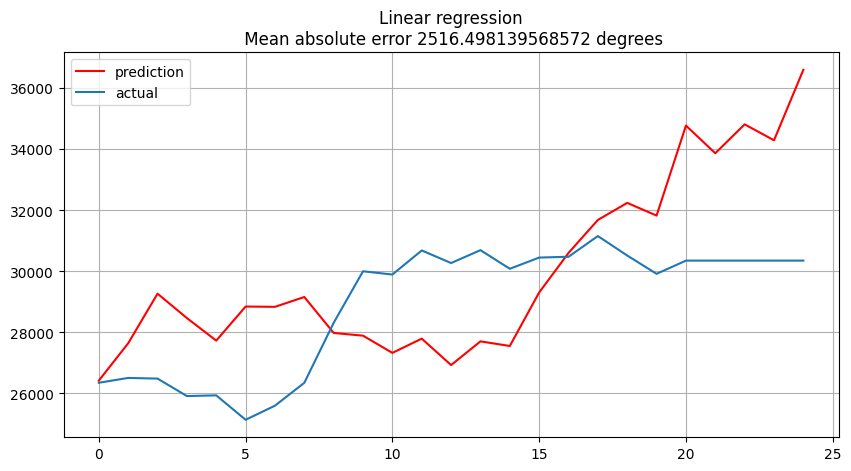

In [ ]:
cb = CatBoostRegressor(n_estimators=300)
cb.fit(X_train, y_train)
preds = cb.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");

Сохраним прогноз в файл и отправим на kaggle.

In [ ]:
X_test

,Adj Close_x,Adj Close_y,Adj Close,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,...,lag_oil_11,lag_SP_12,lag_eth_12,lag_oil_12,lag_SP_13,lag_eth_13,lag_oil_13,day_average,month_average,year_average
0,0.88473,0.389972,0.178195,0.485435,0.464016,0.463158,0.451567,0.470842,0.457516,0.470536,...,0.016854,0.712887,0.330739,0.046173,0.710339,0.344202,0.042486,0.015855,0.253139,0.0


In [ ]:
X_test['Date'] = data.index[-7:]
X_test['Price'] = preds[-7:]

X_test.set_index('Date', inplace=True)

ValueError: ignored

In [ ]:
X_test[['Price']]

,Price
Date,
2023-07-05,31171.701172
2023-07-06,31025.164062
2023-07-07,31069.500000
2023-07-10,31224.878906
2023-07-11,32383.947266
2023-07-12,33025.753906
2023-07-13,36895.925781


In [ ]:
X_test[['Price']].to_csv("pred_xgb2.csv")

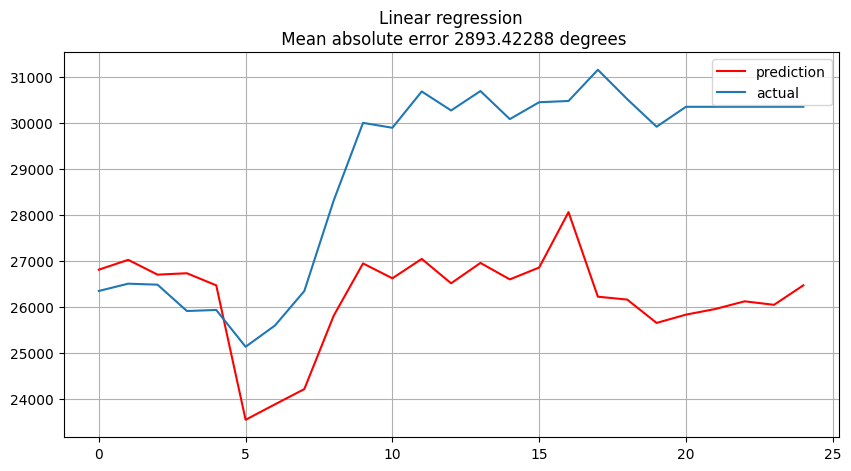

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");